<a href="https://colab.research.google.com/github/Mathijs-me/Pairs-trading/blob/main/The_baseline_approach_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

#Setting the end date to today
end = datetime.today()

#We are going to analyze the top cryptocurrencies.
cc_list = ['BTC-USD','ETH-USD','LTC-USD','^GSPC','CL=F','^DJI','^IXIC','^RUT','GC=F']


#Setting the end date to today
end =  datetime(end.year,end.month,end.day)

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day-1)

In [3]:
# x = ['BTC-USD','ETH-USD',"LTC-USD","BNB-USD","XRP-USD", "ADA-USD"]
# close_df = pdr.DataReader(x,'yahoo',start,end).Close

In [58]:
table=pd.read_html('https://finance.yahoo.com/cryptocurrencies/')
x=list(table[0]['Symbol'])
[x.remove(i) for i in ['USDT-USD',"USDC-USD"]]


[None, None]

In [59]:
x

['BTC-USD',
 'ETH-USD',
 'BNB-USD',
 'DOT1-USD',
 'ADA-USD',
 'XRP-USD',
 'DOT2-USD',
 'LTC-USD',
 'LINK-USD',
 'THETA-USD',
 'BCH-USD',
 'XLM-USD',
 'TRX-USD',
 'DOGE-USD',
 'LUNA1-USD',
 'VET-USD',
 'EOS-USD',
 'SOL1-USD',
 'XMR-USD',
 'MIOTA-USD',
 'XTZ-USD',
 'BSV-USD',
 'ATOM1-USD']

In [60]:
close_df = pd.DataFrame()

for i in x:
  print(i)
  try:
    close_df[str(i)] = pdr.DataReader(i,'yahoo',start,end).Close
  except: KeyError 
close_df = close_df.iloc[:,:10]

BTC-USD
ETH-USD
BNB-USD
DOT1-USD
ADA-USD
XRP-USD
DOT2-USD
LTC-USD
LINK-USD
THETA-USD
BCH-USD
XLM-USD
TRX-USD
DOGE-USD
LUNA1-USD
VET-USD
EOS-USD
SOL1-USD
XMR-USD
MIOTA-USD
XTZ-USD
BSV-USD
ATOM1-USD


In [61]:
# Normalize; first value is 1
close_df = close_df/close_df.iloc[0,:]

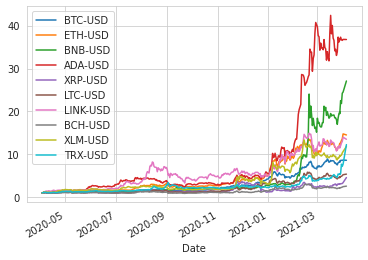

In [62]:
close_df.plot()

In [63]:
SSD = pd.DataFrame()

for i in range(len(close_df.columns)):
  SSD[str(close_df.columns[i])] = [((close_df.iloc[:,i] - close_df.iloc[:,j])**2).sum() for j in range(len(close_df.columns))]
SSD = SSD.where(SSD != 0)
SSD.index = SSD.columns

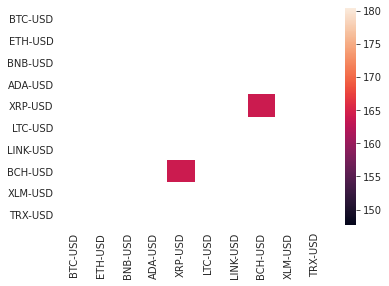

In [64]:
sns.heatmap(SSD[SSD == SSD.min().min()])

In [21]:
Pears = close_df.pct_change().corr()
Pears = Pears.where(Pears != 1)
Pears[Pears == Pears.max()]

Symbols,BTC-USD,ETH-USD,LTC-USD,BNB-USD,XRP-USD,ADA-USD
Symbols,,,,,,
BTC-USD,NaN,NaN,NaN,0.47899,NaN,NaN
ETH-USD,NaN,NaN,0.75916,NaN,NaN,0.609019
LTC-USD,0.746649,0.75916,NaN,NaN,0.428255,NaN
BNB-USD,NaN,NaN,NaN,NaN,NaN,NaN
XRP-USD,NaN,NaN,NaN,NaN,NaN,NaN
ADA-USD,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
SSD[SSD == SSD.min()]

,BTC-USD,ETH-USD,LTC-USD,BNB-USD,XRP-USD,ADA-USD,USDT-USD,LINK-USD,BCH-USD,XLM-USD,TRX-USD,DOGE-USD,EOS-USD,XMR-USD,MIOTA-USD,XTZ-USD
BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.344918,NaN
ETH-USD,NaN,NaN,NaN,3935.333972,NaN,NaN,NaN,1010.535575,NaN,554.145299,NaN,NaN,NaN,NaN,NaN,NaN
LTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.502232,NaN,NaN
BNB-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRP-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADA-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6383.62413,NaN,NaN,NaN,NaN
USDT-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LINK-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCH-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.506967,NaN,NaN,NaN
XLM-USD,NaN,554.145299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


BTC-USD
ETH-USD
BNB-USD
USDT-USD
DOT1-USD
ADA-USD
XRP-USD
DOT2-USD
LTC-USD
LINK-USD
THETA-USD
BCH-USD
XLM-USD
USDC-USD
TRX-USD
DOGE-USD
LUNA1-USD
VET-USD
EOS-USD
SOL1-USD
XMR-USD
MIOTA-USD
XTZ-USD
BSV-USD
ATOM1-USD


,BTC-USD,ETH-USD,BNB-USD,USDT-USD,ADA-USD,XRP-USD,LTC-USD,LINK-USD,BCH-USD,XLM-USD,TRX-USD,DOGE-USD,EOS-USD,XMR-USD,MIOTA-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,
2020-04-03,6867.527344,145.219391,13.824528,1.004113,0.032505,0.181732,40.675556,2.326213,238.819336,0.041943,0.011998,0.001880,2.367535,54.279442,0.153524,1.702670
2020-04-04,6791.129395,143.546646,13.734116,1.002850,0.032003,0.179406,40.670139,2.277325,231.997986,0.043488,0.012603,0.001865,2.362716,53.490597,0.149779,1.670830
2020-04-05,7271.781250,169.135880,15.084521,0.992833,0.035616,0.195506,44.391121,2.513414,255.919510,0.049474,0.013658,0.001980,2.731257,58.378181,0.165361,1.885559
2020-04-06,7176.414551,165.101944,14.681547,0.998629,0.035137,0.192093,44.667931,2.717985,252.057327,0.048317,0.013266,0.001997,2.629761,55.929985,0.164093,1.957070
2020-04-07,7334.098633,172.641739,15.056076,0.999124,0.036314,0.200869,46.319859,3.139041,266.239716,0.050983,0.013695,0.002012,2.734703,57.550617,0.173288,2.137442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-29,58917.691406,1846.033691,311.426483,1.000896,1.213317,0.566859,196.682098,27.904049,527.698242,0.405941,0.066086,0.053900,4.358497,245.470764,1.590062,4.594000
2021-03-30,58918.832031,1918.362061,302.063446,1.000020,1.193264,0.573869,197.499100,29.351137,543.237854,0.410898,0.092312,0.053657,4.813305,246.150543,1.579239,4.856900
2021-03-31,59095.808594,1977.276855,335.212891,1.000464,1.189244,0.579292,204.112518,30.233219,561.658264,0.432512,0.086120,0.061986,5.622708,252.495819,1.640169,5.161216
